In [4]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

# lire la base de donnés
df = pd.read_csv (r'C:\Users\mbond\Downloads\portofoliodata\portofoliopython\movies.csv')


In [5]:
# un apperçu des données

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# let'st see if we have misssing data

# Parcours chaque colonne du DataFrame 'df'.
for col in df.columns:
    # Calcule le pourcentage de valeurs manquantes dans la colonne actuelle.
    pct_missing = np.mean(df[col].isnull())
    
    # Affiche le nom de la colonne et le pourcentage de valeurs manquantes.
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
# data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
#change type of the columns

df['budget'] = df['budget'].astype('Int64')


df['gross'] = df['gross'].astype('Int64')

In [94]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,June
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,July
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,June
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,July
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,July


In [92]:
#create a correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,June
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,July
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,June
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,July
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,July


In [19]:
df.drop('yearcorrect', axis=1, inplace=True)

KeyError: "['yearcorrect'] not found in axis"

In [20]:
df = df.drop('yearcorrect', axis=1)

KeyError: "['yearcorrect'] not found in axis"

In [91]:
df.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


In [23]:
#
df.sort_values(by=['gross'], inplace=false, ascending = false)


NameError: name 'false' is not defined

In [95]:
df.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,June
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,July
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,June
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,July
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,July


In [28]:
# Activer l'affichage de toutes les lignes sans troncature
pd.set_option('display.max_rows',None)

In [90]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


In [97]:
# drop the duplicates
df['company'].drop_duplicates().sort_values(ascending = False).head()

7129        thefyzz
5664    micro_scope
4007       i5 Films
6793     i am OTHER
6420           erbp
Name: company, dtype: object

In [96]:
df.drop_duplicates().head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,June
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,July
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,June
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,July
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,July


In [ ]:
# budget have high correlation
# company have high correlation


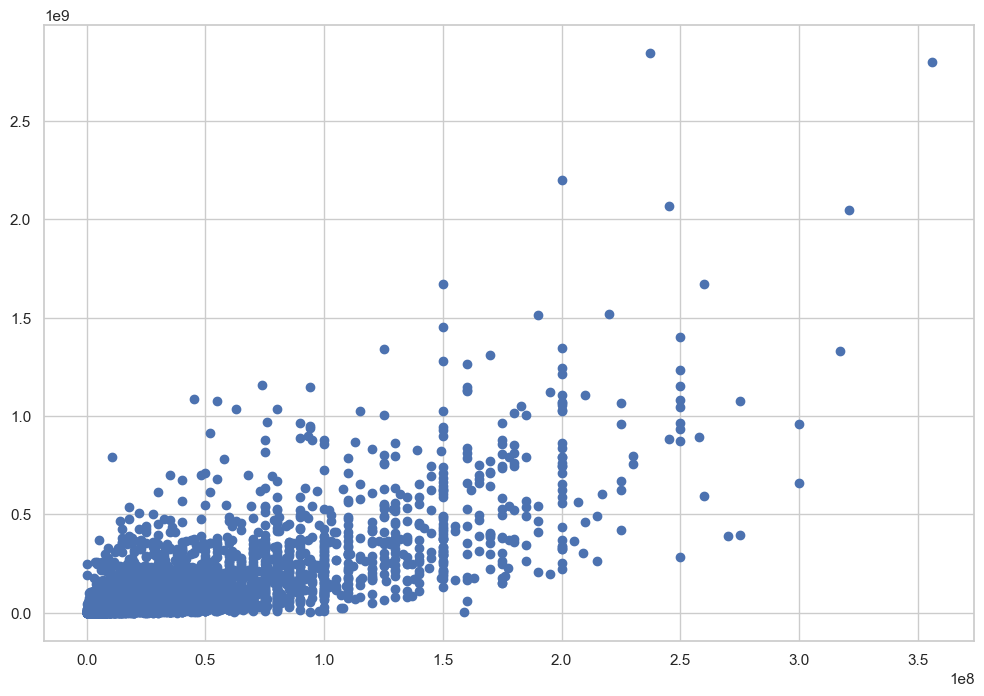

In [49]:
# scatter plot with budget vs gross(nuage de point)

plt.scatter(x=df['budget'], y=df['gross'])

plt.show()

UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

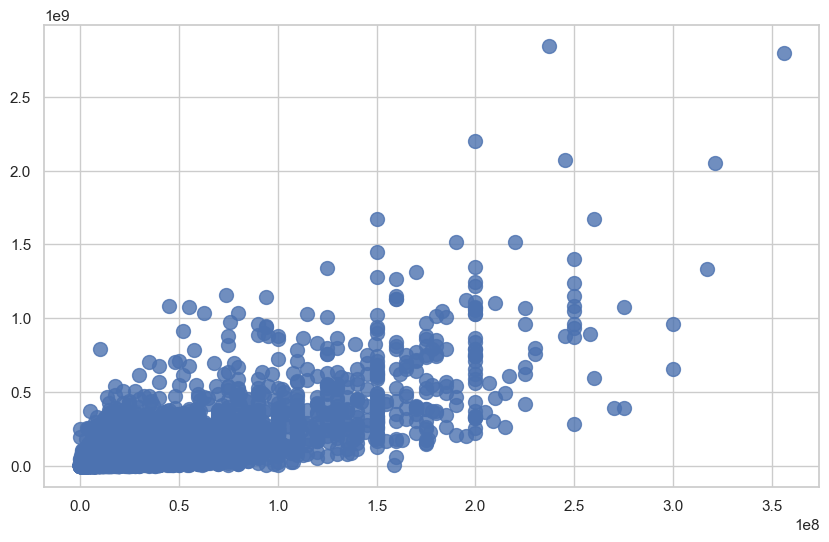

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertissez les colonnes 'budget' et 'gross' en types de données numériques
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

# Supprimez les lignes avec des valeurs manquantes dans 'budget' ou 'gross'
df.dropna(subset=['budget', 'gross'], inplace=True)

# Créez le graphique de régression
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x="budget", y="gross", data=df, color='b', scatter_kws={'s': 100}, line_kws={'color': 'r'})
plt.title('Graphique de Régression entre Budget et Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()


In [48]:
pip install seaborn


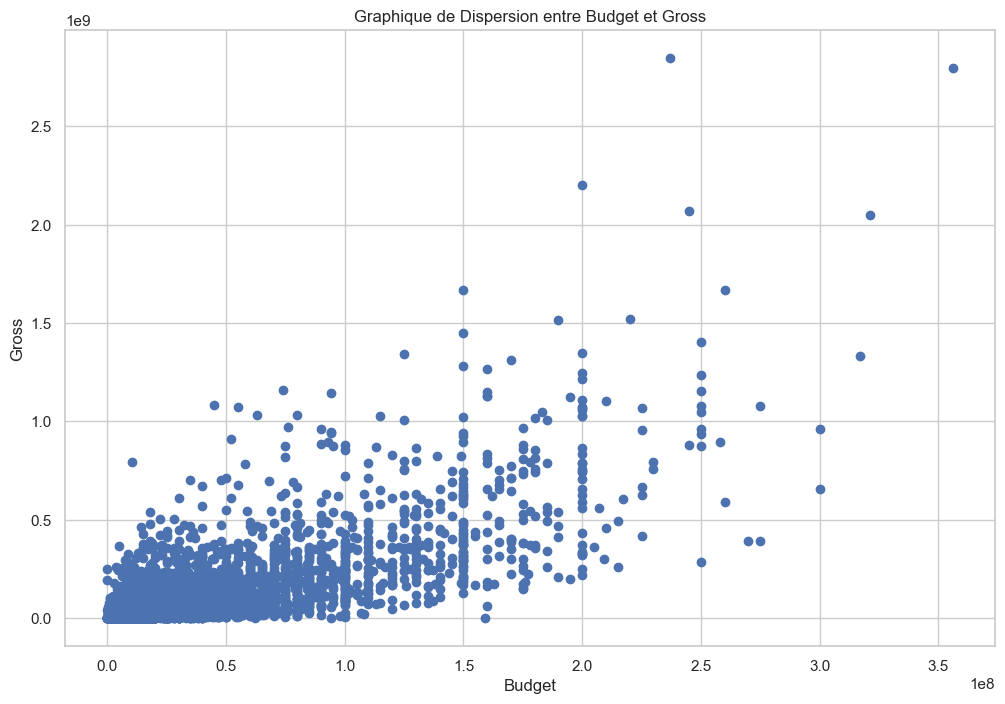

In [46]:
# Supprimez les lignes avec des valeurs manquantes dans 'budget' ou 'gross'
df.dropna(subset=['budget', 'gross'], inplace=True)

# Créez le graphique de dispersion
plt.scatter(x=df['budget'], y=df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Graphique de Dispersion entre Budget et Gross')
plt.show()

In [43]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [52]:
df['budget'].fillna(0, inplace=True)
df['gross'].fillna(0, inplace=True)


In [53]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')


In [55]:
print(df[['budget', 'gross']].head())


     budget      gross
0  19000000   46998772
1   4500000   58853106
2  18000000  538375067
3   3500000   83453539
4   6000000   39846344


In [79]:
df = df.reindex(sorted(df.columns), axis=1)


In [57]:
print(df[['budget', 'gross']].dtypes)


budget    Int64
gross     Int64
dtype: object


In [58]:
df = df[df['budget'].notna() & df['gross'].notna()]


In [64]:
# Supprimez les lignes avec des valeurs manquantes dans les colonnes 'budget' et 'gross' si nécessaire
df = df.dropna(subset=['budget', 'gross'])

# Convertissez les colonnes 'budget' et 'gross' en types de données numériques
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')


UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

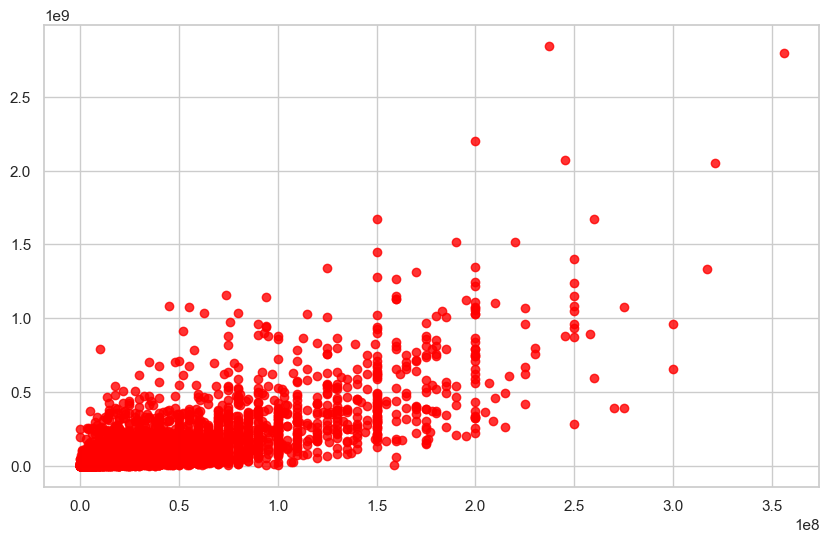

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('Graphique de Régression entre Budget et Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [67]:
# let' star correlation
df.corr(method='pearson') # pearson, kendall, spearman

C:\Users\mbond\AppData\Local\Temp\ipykernel_19664\1834609147.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') # pearson, kendall, spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


### df.corr(method='pearson') # pearson, kendall, spearman

In [69]:
# high  =correlation between budget and gross , i was right

C:\Users\mbond\AppData\Local\Temp\ipykernel_19664\1496090573.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


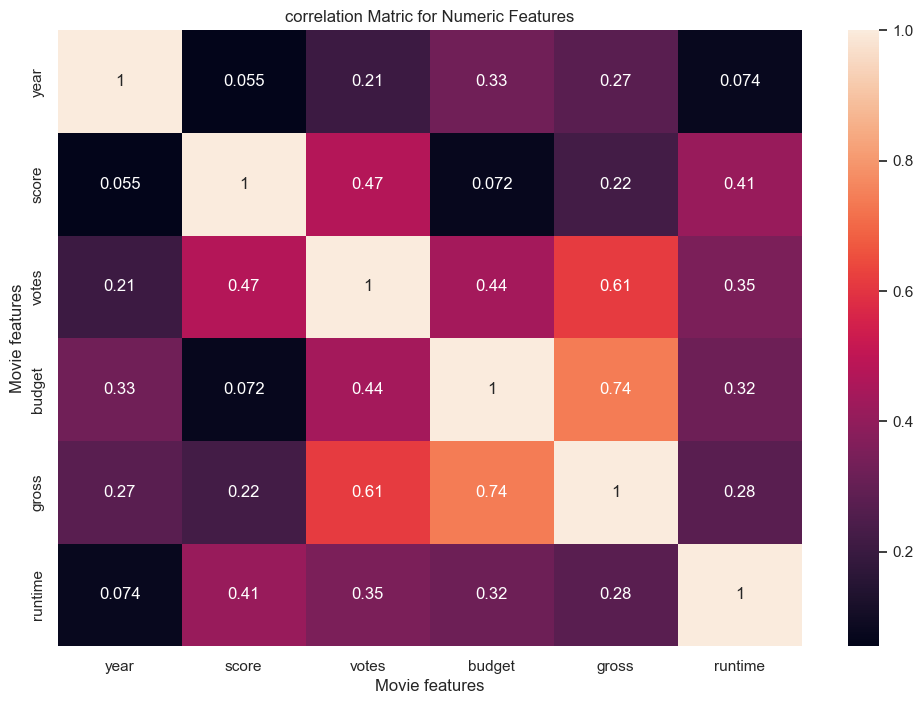

In [73]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.title('correlation Matric for Numeric Features')
plt.show()

# look at the company
df.head()

In [74]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [89]:
# Créez une copie du DataFrame original pour ne pas modifier les données d'origine
df_numerized = df.copy()

# Boucle à travers les colonnes du DataFrame
for col_name in df_numerized.columns:
    # Vérifiez si la colonne a le type 'object' (c'est-à-dire du texte)
    if df_numerized[col_name].dtype == 'object':
        # Convertissez la colonne en type 'category'
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        # Utilisez cat.codes pour encoder les valeurs catégoriques en numériques
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# Affichez le DataFrame modifié
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,1432,46,1800,6,46998772,4706,6,1308,146.0,8.4,700,927000.0,2841,1980
1,4500000,454,47,1581,1,58853106,3943,6,1131,104.0,5.8,215,65000.0,1160,1980
2,18000000,949,47,759,0,538375067,3654,4,1363,124.0,8.7,1161,1200000.0,1822,1980
3,3500000,1114,47,891,4,83453539,205,4,1131,88.0,7.7,1478,221000.0,1416,1980
4,6000000,1089,47,721,4,39846344,734,6,1174,98.0,7.3,272,108000.0,352,1980


In [88]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


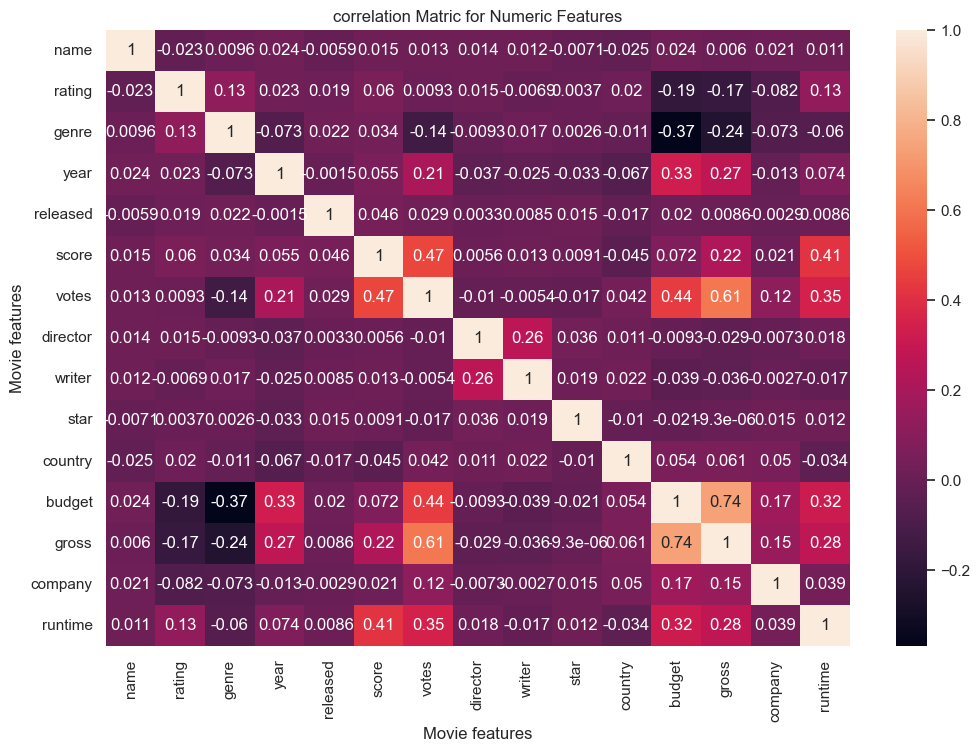

In [81]:
df = df.reindex(sorted(df.columns), axis=1)
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.title('correlation Matric for Numeric Features')
plt.show()

In [82]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.023013,0.009617,0.024435,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800
rating,-0.023013,1.000000,0.128102,0.022668,0.018836,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239
genre,0.009617,0.128102,1.000000,-0.073026,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186
year,0.024435,0.022668,-0.073026,1.000000,-0.001481,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.066662,0.327781,0.274264,-0.013062,0.074203
released,-0.005896,0.018836,0.021712,-0.001481,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.008614,-0.002927,0.008619
score,0.014955,0.059550,0.034061,0.055174,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580
votes,0.012915,0.009255,-0.136457,0.205758,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437
director,0.013699,0.014847,-0.009303,-0.036936,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082
writer,0.011602,-0.006923,0.017500,-0.024568,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672
star,-0.007109,0.003737,0.002619,-0.032770,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439


In [103]:
#En résumé, ce code génère une matrice de corrélation à partir d'un DataFrame numérisé,
#puis décompose cette matrice en une série de paires de corrélations, 
#ce qui peut être utile pour analyser les relations entre les différentes variables numériques de votre jeu de données. 
#Les paires de corrélations ainsi obtenues 
#vous permettront de voir quelles variables sont fortement corrélées les unes aux autres et quelles sont les relations potentielles entre elles
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget    budget      1.000000
          company     0.171385
          country     0.054372
          director   -0.009340
          genre      -0.368900
          gross       0.740395
          name        0.023698
          rating     -0.186892
          released    0.019888
          runtime     0.318595
          score       0.071792
          star       -0.021282
          votes       0.440021
          writer     -0.039420
          year        0.327781
company   budget      0.171385
          company     1.000000
          country     0.049559
          director   -0.007337
          genre      -0.073293
          gross       0.150233
          name        0.021209
          rating     -0.082189
          released   -0.002927
          runtime     0.038752
          score       0.021054
          star        0.015086
          votes       0.119366
          writer     -0.002658
          year       -0.013062
country   budget      0.054372
          company     0.049559
        

In [102]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.368900
budget    genre      -0.368900
genre     gross      -0.244380
gross     genre      -0.244380
rating    budget     -0.186892
budget    rating     -0.186892
rating    gross      -0.168814
gross     rating     -0.168814
genre     votes      -0.136457
votes     genre      -0.136457
rating    company    -0.082189
company   rating     -0.082189
genre     company    -0.073293
company   genre      -0.073293
year      genre      -0.073026
genre     year       -0.073026
year      country    -0.066662
country   year       -0.066662
genre     runtime    -0.060186
runtime   genre      -0.060186
score     country    -0.044690
country   score      -0.044690
writer    budget     -0.039420
budget    writer     -0.039420
director  year       -0.036936
year      director   -0.036936
gross     writer     -0.035999
writer    gross      -0.035999
runtime   country    -0.033554
country   runtime    -0.033554
star      year       -0.032770
year      star       -0.032770
gross   

In [101]:
High_corr =  sorted_pairs[(sorted_pairs)> 0.5]
High_corr

votes     gross       0.614904
gross     votes       0.614904
          budget      0.740395
budget    gross       0.740395
          budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64

In [ ]:
#votes and budget have the highest correlation to gross earnings